In [37]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data Cleaning


In [38]:
df = pd.read_csv('imdb_scraping.csv')
df


,Unnamed: 0,titles,year,imdb_ratings,text_muted1,text_muted2,text_muted3,meta_scores,director,stars
0,0,The Shawshank Redemption,(1994),9.3,\nR\n|\n142 min\n|\n\nDrama \n,\nTwo imprisoned men bond over a number of yea...,"\nVotes:\n2,647,314\n| Gross:\n$28.34M\n",81.0,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'..."
1,1,The Godfather,(1972),9.2,"\n175 min\n|\n\nCrime, Drama \n",\nThe aging patriarch of an organized crime dy...,"\nVotes:\n1,835,072\n| Gross:\n$134.97M\n",100.0,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '..."
2,2,The Dark Knight,(2008),9.0,"\nPG-13\n|\n152 min\n|\n\nAction, Crime, Drama...",\nWhen the menace known as the Joker wreaks ha...,"\nVotes:\n2,619,277\n| Gross:\n$534.86M\n",84.0,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
3,3,The Lord of the Rings: The Return of the King,(2003),9.0,"\nPG-13\n|\n201 min\n|\n\nAction, Adventure, D...",\nGandalf and Aragorn lead the World of Men ag...,"\nVotes:\n1,823,184\n| Gross:\n$377.85M\n",94.0,['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell..."
4,4,Schindler's List,(1993),9.0,"\nR\n|\n195 min\n|\n\nBiography, Drama, Histor...",\nIn German-occupied Poland during World War I...,"\nVotes:\n1,341,758\n| Gross:\n$96.90M\n",94.0,['Steven Spielberg'],"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley..."
...,...,...,...,...,...,...,...,...,...,...
9895,9895,Superbabies: Baby Geniuses 2,(2004),1.5,"\nPG\n|\n88 min\n|\n\nComedy, Family, Sci-Fi ...",\nA group of smart-talking toddlers find thems...,"\nVotes:\n31,108\n| Gross:\n$9.11M\n",9.0,['Bob Clark'],"['Jon Voight', 'Scott Baio', 'Vanessa Angel', ..."
9896,9896,Saving Christmas,(2014),1.3,"\nPG\n|\n79 min\n|\n\nComedy, Family ...",\nHis annual Christmas party faltering thanks ...,"\nVotes:\n15,947\n| Gross:\n$2.78M\n",18.0,['Darren Doane'],"['Kirk Cameron', 'Darren Doane', 'Bridgette Ca..."
9897,9897,Foodfight!,(2012),1.3,"\nPG\n|\n91 min\n|\n\nAnimation, Action, Adven...",\nThe evil Brand X joins a supermarket that be...,"\nVotes:\n11,045\n",NaN,['Lawrence Kasanoff'],"['Hilary Duff', 'Haylie Duff', 'Charlie Sheen'..."
9898,9898,Smolensk,(2016),1.2,"\n120 min\n|\n\nDrama, Thriller \n",\nAn inspired story of people affected by the ...,"\nVotes:\n39,697\n",NaN,['Antoni Krauze'],"['Beata Fido', 'Maciej Póltorak', 'Aldona Stru..."


In [39]:
df[df.duplicated(keep=False)]


,Unnamed: 0,titles,year,imdb_ratings,text_muted1,text_muted2,text_muted3,meta_scores,director,stars


In [40]:
df['year'] = df['year'].str.extract('(\d+)').astype(int)
df['year']


0       1994
1       1972
2       2008
3       2003
4       1993
        ... 
9895    2004
9896    2014
9897    2012
9898    2016
9899    2022
Name: year, Length: 9900, dtype: int32

In [41]:
df['text_muted1'] = df['text_muted1'].str.replace(r'\n', '')
df['text_muted1']


0                             R|142 min|Drama            
1                        175 min|Crime, Drama            
2          PG-13|152 min|Action, Crime, Drama            
3       PG-13|201 min|Action, Adventure, Drama        ...
4         R|195 min|Biography, Drama, History            
                              ...                        
9895         PG|88 min|Comedy, Family, Sci-Fi            
9896                 PG|79 min|Comedy, Family            
9897    PG|91 min|Animation, Action, Adventure        ...
9898                  120 min|Drama, Thriller            
9899                             48 min|Drama            
Name: text_muted1, Length: 9900, dtype: object

In [42]:
dfm1 = df['text_muted1'].str.split('|', 2, expand=True)
dfm1


,0,1,2
0,R,142 min,Drama
1,175 min,"Crime, Drama",None
2,PG-13,152 min,"Action, Crime, Drama"
3,PG-13,201 min,"Action, Adventure, Drama"
4,R,195 min,"Biography, Drama, History"
...,...,...,...
9895,PG,88 min,"Comedy, Family, Sci-Fi"
9896,PG,79 min,"Comedy, Family"
9897,PG,91 min,"Animation, Action, Adventure"
9898,120 min,"Drama, Thriller",None


In [43]:
rating = []
runtime = []
genre = []

for i in range(len(dfm1)):
    rating.append(None if dfm1[0][i].find('min') > 0 else dfm1[0][i])
    runtime.append(dfm1[0][i] if dfm1[0][i].find('min') > 0 else dfm1[1][i])
    genre.append(dfm1[2][i] if dfm1[1][i].find('min') > 0 else dfm1[1][i])
genre = [w.replace(' ', '') for w in genre]
dfm1 = pd.DataFrame({'rating': rating,
                     'genre': genre,
                     'runtime': runtime,
                     })
dfm1


,rating,genre,runtime
0,R,Drama,142 min
1,None,"Crime,Drama",175 min
2,PG-13,"Action,Crime,Drama",152 min
3,PG-13,"Action,Adventure,Drama",201 min
4,R,"Biography,Drama,History",195 min
...,...,...,...
9895,PG,"Comedy,Family,Sci-Fi",88 min
9896,PG,"Comedy,Family",79 min
9897,PG,"Animation,Action,Adventure",91 min
9898,None,"Drama,Thriller",120 min


In [44]:
df['brief'] = df['text_muted2'].str.replace(r'\n', '')
df['brief']


0       Two imprisoned men bond over a number of years...
1       The aging patriarch of an organized crime dyna...
2       When the menace known as the Joker wreaks havo...
3       Gandalf and Aragorn lead the World of Men agai...
4       In German-occupied Poland during World War II,...
                              ...                        
9895    A group of smart-talking toddlers find themsel...
9896    His annual Christmas party faltering thanks to...
9897    The evil Brand X joins a supermarket that beco...
9898    An inspired story of people affected by the tr...
9899    After losing her home and all that she's known...
Name: brief, Length: 9900, dtype: object

In [45]:
df['text_muted3'] = df['text_muted3'].str.replace(r'\n', '')
dfm2 = df['text_muted3'].str.split('|', 2, expand=True)
dfm2.columns = ['votes', 'gross']
dfm2


,votes,gross
0,"Votes:2,647,314",Gross:$28.34M
1,"Votes:1,835,072",Gross:$134.97M
2,"Votes:2,619,277",Gross:$534.86M
3,"Votes:1,823,184",Gross:$377.85M
4,"Votes:1,341,758",Gross:$96.90M
...,...,...
9895,"Votes:31,108",Gross:$9.11M
9896,"Votes:15,947",Gross:$2.78M
9897,"Votes:11,045",None
9898,"Votes:39,697",None


In [46]:
dfm2['votes'] = dfm2.votes.str[6:]
dfm2['gross'] = dfm2.gross.str[8:-1]
dfm2


,votes,gross
0,"2,647,314",28.34
1,"1,835,072",134.97
2,"2,619,277",534.86
3,"1,823,184",377.85
4,"1,341,758",96.90
...,...,...
9895,"31,108",9.11
9896,"15,947",2.78
9897,"11,045",None
9898,"39,697",None


In [47]:
df = df.join(dfm1, how="right")
df = df.join(dfm2, how="right")
df


,Unnamed: 0,titles,year,imdb_ratings,text_muted1,text_muted2,text_muted3,meta_scores,director,stars,brief,rating,genre,runtime,votes,gross
0,0,The Shawshank Redemption,1994,9.3,R|142 min|Drama,\nTwo imprisoned men bond over a number of yea...,"Votes:2,647,314| Gross:$28.34M",81.0,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Two imprisoned men bond over a number of years...,R,Drama,142 min,"2,647,314",28.34
1,1,The Godfather,1972,9.2,"175 min|Crime, Drama",\nThe aging patriarch of an organized crime dy...,"Votes:1,835,072| Gross:$134.97M",100.0,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...",The aging patriarch of an organized crime dyna...,None,"Crime,Drama",175 min,"1,835,072",134.97
2,2,The Dark Knight,2008,9.0,"PG-13|152 min|Action, Crime, Drama",\nWhen the menace known as the Joker wreaks ha...,"Votes:2,619,277| Gross:$534.86M",84.0,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",When the menace known as the Joker wreaks havo...,PG-13,"Action,Crime,Drama",152 min,"2,619,277",534.86
3,3,The Lord of the Rings: The Return of the King,2003,9.0,"PG-13|201 min|Action, Adventure, Drama ...",\nGandalf and Aragorn lead the World of Men ag...,"Votes:1,823,184| Gross:$377.85M",94.0,['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",Gandalf and Aragorn lead the World of Men agai...,PG-13,"Action,Adventure,Drama",201 min,"1,823,184",377.85
4,4,Schindler's List,1993,9.0,"R|195 min|Biography, Drama, History",\nIn German-occupied Poland during World War I...,"Votes:1,341,758| Gross:$96.90M",94.0,['Steven Spielberg'],"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","In German-occupied Poland during World War II,...",R,"Biography,Drama,History",195 min,"1,341,758",96.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,9895,Superbabies: Baby Geniuses 2,2004,1.5,"PG|88 min|Comedy, Family, Sci-Fi",\nA group of smart-talking toddlers find thems...,"Votes:31,108| Gross:$9.11M",9.0,['Bob Clark'],"['Jon Voight', 'Scott Baio', 'Vanessa Angel', ...",A group of smart-talking toddlers find themsel...,PG,"Comedy,Family,Sci-Fi",88 min,"31,108",9.11
9896,9896,Saving Christmas,2014,1.3,"PG|79 min|Comedy, Family",\nHis annual Christmas party faltering thanks ...,"Votes:15,947| Gross:$2.78M",18.0,['Darren Doane'],"['Kirk Cameron', 'Darren Doane', 'Bridgette Ca...",His annual Christmas party faltering thanks to...,PG,"Comedy,Family",79 min,"15,947",2.78
9897,9897,Foodfight!,2012,1.3,"PG|91 min|Animation, Action, Adventure ...",\nThe evil Brand X joins a supermarket that be...,"Votes:11,045",NaN,['Lawrence Kasanoff'],"['Hilary Duff', 'Haylie Duff', 'Charlie Sheen'...",The evil Brand X joins a supermarket that beco...,PG,"Animation,Action,Adventure",91 min,"11,045",None
9898,9898,Smolensk,2016,1.2,"120 min|Drama, Thriller",\nAn inspired story of people affected by the ...,"Votes:39,697",NaN,['Antoni Krauze'],"['Beata Fido', 'Maciej Póltorak', 'Aldona Stru...",An inspired story of people affected by the tr...,None,"Drama,Thriller",120 min,"39,697",None


In [48]:
df = df.drop(columns=['Unnamed: 0', 'text_muted1',
             'text_muted2', 'text_muted3'])
df


,titles,year,imdb_ratings,meta_scores,director,stars,brief,rating,genre,runtime,votes,gross
0,The Shawshank Redemption,1994,9.3,81.0,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Two imprisoned men bond over a number of years...,R,Drama,142 min,"2,647,314",28.34
1,The Godfather,1972,9.2,100.0,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...",The aging patriarch of an organized crime dyna...,None,"Crime,Drama",175 min,"1,835,072",134.97
2,The Dark Knight,2008,9.0,84.0,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",When the menace known as the Joker wreaks havo...,PG-13,"Action,Crime,Drama",152 min,"2,619,277",534.86
3,The Lord of the Rings: The Return of the King,2003,9.0,94.0,['Peter Jackson'],"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",Gandalf and Aragorn lead the World of Men agai...,PG-13,"Action,Adventure,Drama",201 min,"1,823,184",377.85
4,Schindler's List,1993,9.0,94.0,['Steven Spielberg'],"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...","In German-occupied Poland during World War II,...",R,"Biography,Drama,History",195 min,"1,341,758",96.90
...,...,...,...,...,...,...,...,...,...,...,...,...
9895,Superbabies: Baby Geniuses 2,2004,1.5,9.0,['Bob Clark'],"['Jon Voight', 'Scott Baio', 'Vanessa Angel', ...",A group of smart-talking toddlers find themsel...,PG,"Comedy,Family,Sci-Fi",88 min,"31,108",9.11
9896,Saving Christmas,2014,1.3,18.0,['Darren Doane'],"['Kirk Cameron', 'Darren Doane', 'Bridgette Ca...",His annual Christmas party faltering thanks to...,PG,"Comedy,Family",79 min,"15,947",2.78
9897,Foodfight!,2012,1.3,NaN,['Lawrence Kasanoff'],"['Hilary Duff', 'Haylie Duff', 'Charlie Sheen'...",The evil Brand X joins a supermarket that beco...,PG,"Animation,Action,Adventure",91 min,"11,045",None
9898,Smolensk,2016,1.2,NaN,['Antoni Krauze'],"['Beata Fido', 'Maciej Póltorak', 'Aldona Stru...",An inspired story of people affected by the tr...,None,"Drama,Thriller",120 min,"39,697",None


In [49]:
len_gen = []
for row in df['genre']:
    len_gen.append(row.count(',')+1)
max(len_gen)


3

In [50]:
df[['genre1', 'genre2', 'genre3']] = df['genre'].str.split(',', 2, expand=True)


In [51]:
df['votes'] = df['votes'].str.replace(',', '')
df['votes'] = df['votes'].astype(int)


In [52]:
df['stars'] = df.stars.str[1:-1]
df['director'] = df.director.str[1:-1]
df['runtime'] = df.runtime.str[:-4]


In [53]:
df['gross'] = df[df['gross'] != None]['gross'].astype(float)
df['stars'] = df[df['stars'] != None]['stars'].astype(str)
df['director'] = df[df['director'] != None]['director'].astype(str)
df['runtime'] = df[df['runtime'] != None]['runtime'].astype(int)


In [54]:
df[['star1', 'star2', 'star3', 'star4']
   ] = df['stars'].str.split(',', 3, expand=True)
df[['star1', 'star2', 'star3', 'star4']]


,star1,star2,star3,star4
0,'Tim Robbins','Morgan Freeman','Bob Gunton','William Sadler'
1,'Marlon Brando','Al Pacino','James Caan','Diane Keaton'
2,'Christian Bale','Heath Ledger','Aaron Eckhart','Michael Caine'
3,'Elijah Wood','Viggo Mortensen','Ian McKellen','Orlando Bloom'
4,'Liam Neeson','Ralph Fiennes','Ben Kingsley','Caroline Goodall'
...,...,...,...,...
9895,'Jon Voight','Scott Baio','Vanessa Angel','Skyler Shaye'
9896,'Kirk Cameron','Darren Doane','Bridgette Cameron','Ben Kientz'
9897,'Hilary Duff','Haylie Duff','Charlie Sheen','Eva Longoria'
9898,'Beata Fido','Maciej Póltorak','Aldona Struzik','Lech Lotocki'


In [55]:
df['rating'] = df['rating'].replace('M/PG', 'PG')
df['rating'] = df['rating'].replace('G', 'PG')
df['rating'] = df['rating'].replace('GP', 'PG')
df['rating'] = df['rating'].replace('ALL', 'PG')
df['rating'] = df['rating'].replace('All', 'PG')

df['rating'] = df['rating'].replace('7 +', 'PG-13')
df['rating'] = df['rating'].replace('7+', 'PG-13')
df['rating'] = df['rating'].replace('13', 'PG-13')

df['rating'] = df['rating'].replace('13 +', 'R')
df['rating'] = df['rating'].replace('13+', 'R')
df['rating'] = df['rating'].replace('u 13+', 'R')
df['rating'] = df['rating'].replace('u13+', 'R')

df['rating'] = df['rating'].replace('PD-14', 'R')
df['rating'] = df['rating'].replace('R-14', 'R')
df['rating'] = df['rating'].replace('15', 'R')
df['rating'] = df['rating'].replace('M', 'R')
df['rating'] = df['rating'].replace('15+', 'R')
df['rating'] = df['rating'].replace('15 +', 'R')

df['rating'] = df['rating'].replace('16 +', 'R')
df['rating'] = df['rating'].replace('16+', 'R')

df['rating'] = df['rating'].replace('18', 'NC-17')
df['rating'] = df['rating'].replace('18+', 'NC-17')
df['rating'] = df['rating'].replace('18 +', 'NC-17')
df['rating'] = df['rating'].replace('20', 'NC-17')


df['rating'] = df['rating'].replace('Not Rated', 'Unrated')
df['rating'] = df['rating'].replace('Passed', 'Unrated')
df['rating'] = df['rating'].replace('Approved', 'Unrated')

df['rating'] = df['rating'].replace('(Banned)', 'Banned')

df[df['rating'] != None]['rating'].value_counts()


R          3667
PG-13      1909
PG         1059
NC-17       170
Unrated      16
Banned       10
Name: rating, dtype: int64

In [56]:
# df = df.drop(columns=['stars','director','genre'])
df = df.rename({'stars': 'all_stars', 'genre': 'all_genre'}, axis=1)
df = df.rename({'runtime': 'runtime(mins)', 'gross': 'gross($M)'}, axis=1)
df


,titles,year,imdb_ratings,meta_scores,director,all_stars,brief,rating,all_genre,runtime(mins),votes,gross($M),genre1,genre2,genre3,star1,star2,star3,star4
0,The Shawshank Redemption,1994,9.3,81.0,'Frank Darabont',"'Tim Robbins', 'Morgan Freeman', 'Bob Gunton',...",Two imprisoned men bond over a number of years...,R,Drama,142,2647314,28.34,Drama,None,None,'Tim Robbins','Morgan Freeman','Bob Gunton','William Sadler'
1,The Godfather,1972,9.2,100.0,'Francis Ford Coppola',"'Marlon Brando', 'Al Pacino', 'James Caan', 'D...",The aging patriarch of an organized crime dyna...,None,"Crime,Drama",175,1835072,134.97,Crime,Drama,None,'Marlon Brando','Al Pacino','James Caan','Diane Keaton'
2,The Dark Knight,2008,9.0,84.0,'Christopher Nolan',"'Christian Bale', 'Heath Ledger', 'Aaron Eckha...",When the menace known as the Joker wreaks havo...,PG-13,"Action,Crime,Drama",152,2619277,534.86,Action,Crime,Drama,'Christian Bale','Heath Ledger','Aaron Eckhart','Michael Caine'
3,The Lord of the Rings: The Return of the King,2003,9.0,94.0,'Peter Jackson',"'Elijah Wood', 'Viggo Mortensen', 'Ian McKelle...",Gandalf and Aragorn lead the World of Men agai...,PG-13,"Action,Adventure,Drama",201,1823184,377.85,Action,Adventure,Drama,'Elijah Wood','Viggo Mortensen','Ian McKellen','Orlando Bloom'
4,Schindler's List,1993,9.0,94.0,'Steven Spielberg',"'Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley'...","In German-occupied Poland during World War II,...",R,"Biography,Drama,History",195,1341758,96.90,Biography,Drama,History,'Liam Neeson','Ralph Fiennes','Ben Kingsley','Caroline Goodall'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,Superbabies: Baby Geniuses 2,2004,1.5,9.0,'Bob Clark',"'Jon Voight', 'Scott Baio', 'Vanessa Angel', '...",A group of smart-talking toddlers find themsel...,PG,"Comedy,Family,Sci-Fi",88,31108,9.11,Comedy,Family,Sci-Fi,'Jon Voight','Scott Baio','Vanessa Angel','Skyler Shaye'
9896,Saving Christmas,2014,1.3,18.0,'Darren Doane',"'Kirk Cameron', 'Darren Doane', 'Bridgette Cam...",His annual Christmas party faltering thanks to...,PG,"Comedy,Family",79,15947,2.78,Comedy,Family,None,'Kirk Cameron','Darren Doane','Bridgette Cameron','Ben Kientz'
9897,Foodfight!,2012,1.3,NaN,'Lawrence Kasanoff',"'Hilary Duff', 'Haylie Duff', 'Charlie Sheen',...",The evil Brand X joins a supermarket that beco...,PG,"Animation,Action,Adventure",91,11045,NaN,Animation,Action,Adventure,'Hilary Duff','Haylie Duff','Charlie Sheen','Eva Longoria'
9898,Smolensk,2016,1.2,NaN,'Antoni Krauze',"'Beata Fido', 'Maciej Póltorak', 'Aldona Struz...",An inspired story of people affected by the tr...,None,"Drama,Thriller",120,39697,NaN,Drama,Thriller,None,'Beata Fido','Maciej Póltorak','Aldona Struzik','Lech Lotocki'


# Data visualization


In [57]:
import matplotlib.pyplot as plt


In [58]:
j = np.arange(1910, 2040, 10)
criteria = []
label = []
for i in range(12):
    criteria.append(df['year'].between(j[i]+1, j[i+1]))
    label.append(str(j[i]+1)+'-' + str(j[i+1]))
values = range(len(criteria))
df['range'] = np.select(criteria, values, 0)


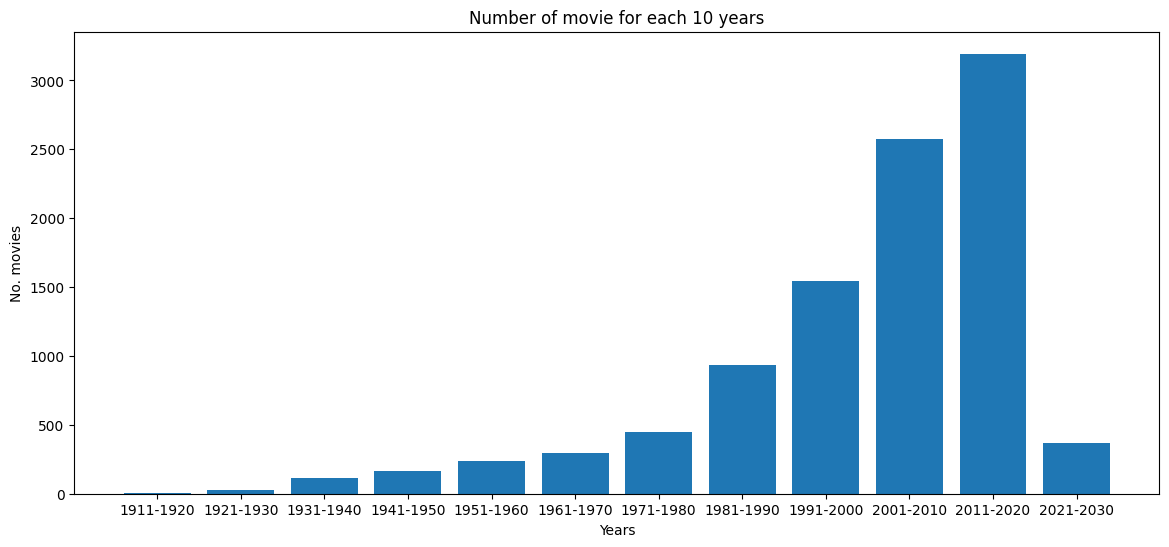

In [59]:
fig = plt.figure(figsize=(14, 6))

plt.bar(label, df['range'].value_counts().sort_index())

plt.xlabel("Years")
plt.ylabel("No. movies")
plt.title("Number of movie for each 10 years")
plt.show()


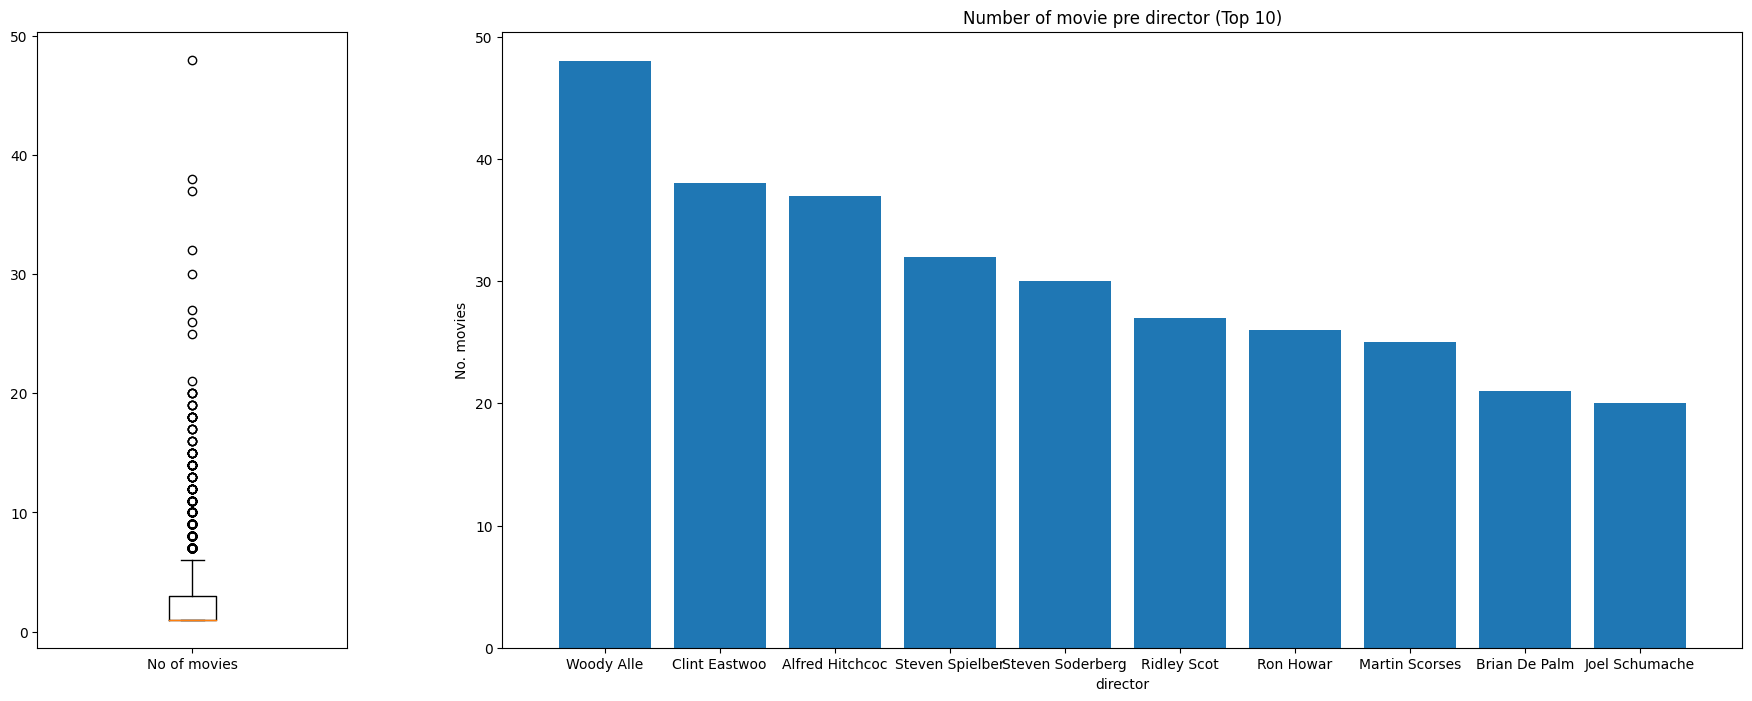

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(
    22, 8), gridspec_kw={'width_ratios': [1, 4]})


axs[0].boxplot(df['director'].value_counts().reset_index()['director'])
axs[0].set_xticks([1], ['No of movies'])


axs[1].bar(df['director'].value_counts().reset_index()['index'].str[1:-2].head(10),
           df['director'].value_counts().reset_index()['director'].head(10))
axs[1].set_xlabel("director")
axs[1].set_ylabel("No. movies")
axs[1].set_title("Number of movie pre director (Top 10)")


plt.show()


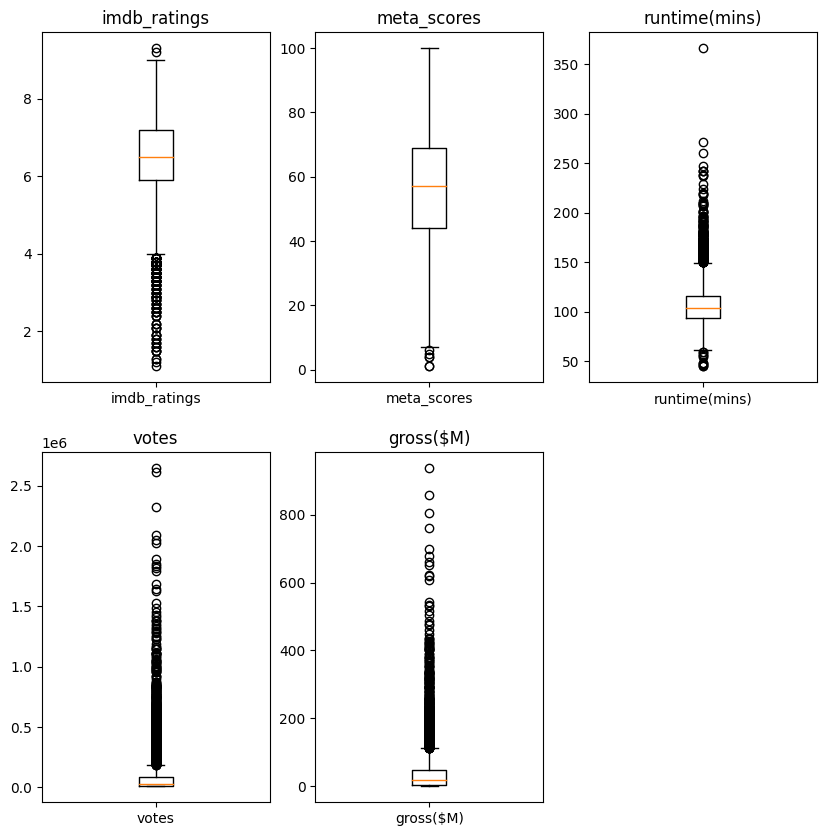

In [61]:
box = ['imdb_ratings',	'meta_scores', 'runtime(mins)', 'votes',	'gross($M)']
k = 0
plt.figure(figsize=(10, 10))
for col in box:
    k = k+1
    plt.subplot(2, 3, k)
    plt.boxplot(df[df[col] >= 0][col])
    plt.xticks([1], [col])
    plt.title(col)


In [62]:
lgen = []
lcount = []
gen = ['genre1', 'genre2', 'genre3']

for col in gen:
    for row in df[col]:
        if row is not None:
            if row not in lgen:
                lgen.append(row)
                lcount.append(1)
            else:
                index = lgen.index(row)
                lcount[index] += 1
lcount, lgen = zip(*sorted(zip(lcount, lgen)))


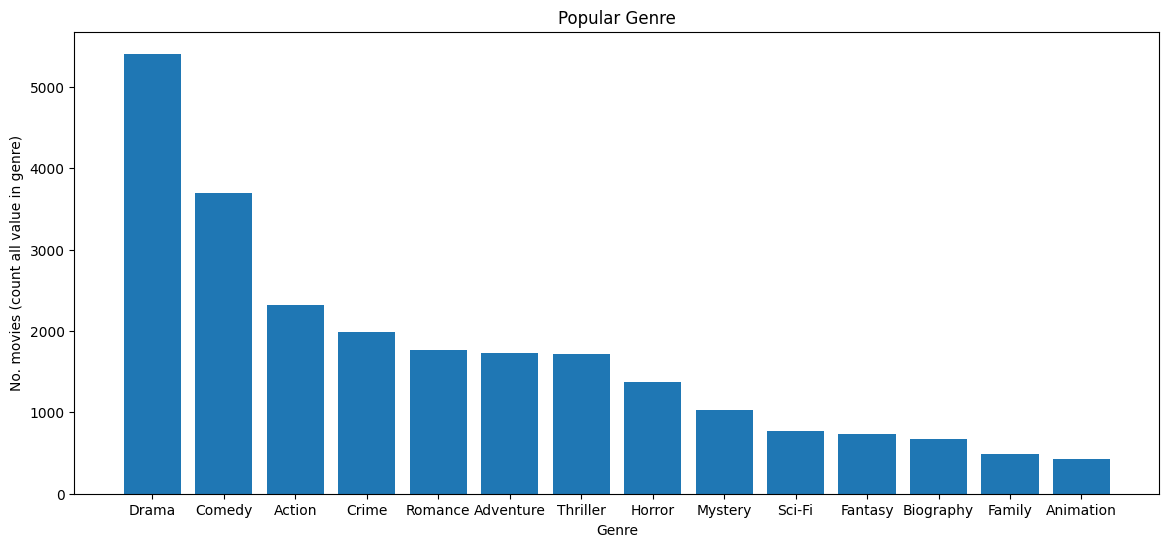

In [63]:
fig = plt.figure(figsize=(14, 6))

plt.bar(lgen[:-15:-1], lcount[:-15:-1])

plt.xlabel("Genre")
plt.ylabel("No. movies (count all value in genre)")
plt.title("Popular Genre")
plt.show()


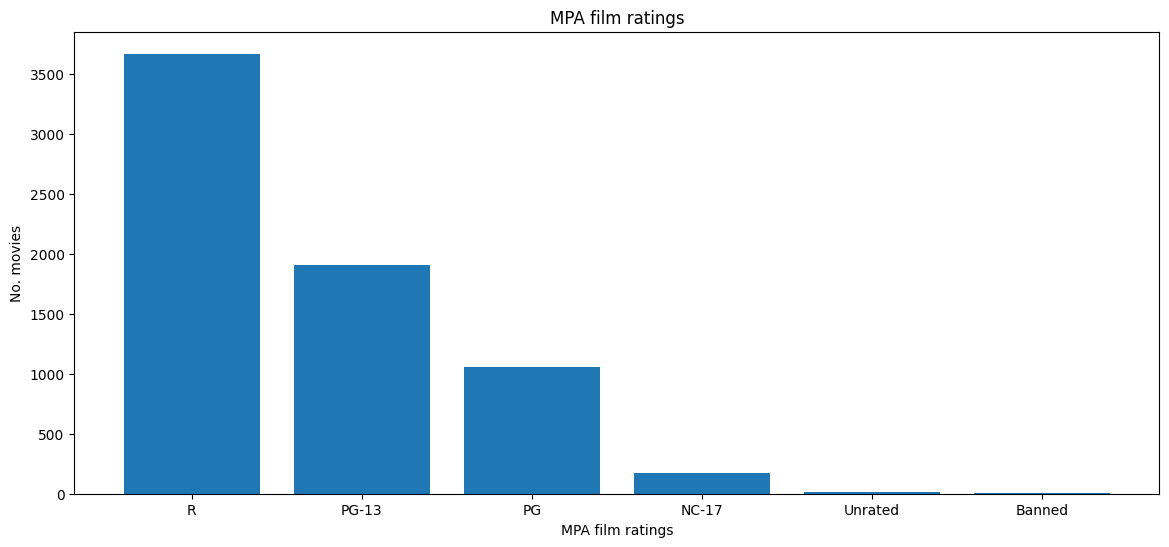

In [64]:
fig = plt.figure(figsize=(14, 6))

plt.bar(df[df['rating'] != None]['rating'].value_counts().reset_index()[
        'index'], df[df['rating'] != None]['rating'].value_counts().reset_index()['rating'])

plt.xlabel("MPA film ratings")
plt.ylabel("No. movies")
plt.title("MPA film ratings")
plt.show()


In [65]:
lact = []
lactount = []
act = ['star1', 'star2', 'star3', 'star4']
for col in act:
    for row in df[col]:
        if row is not None:
            if row not in lact:
                lact.append(row)
                lactount.append(1)
            else:
                index = lact.index(row)
                lactount[index] += 1
lactcount, lact = zip(*sorted(zip(lactount, lact)))


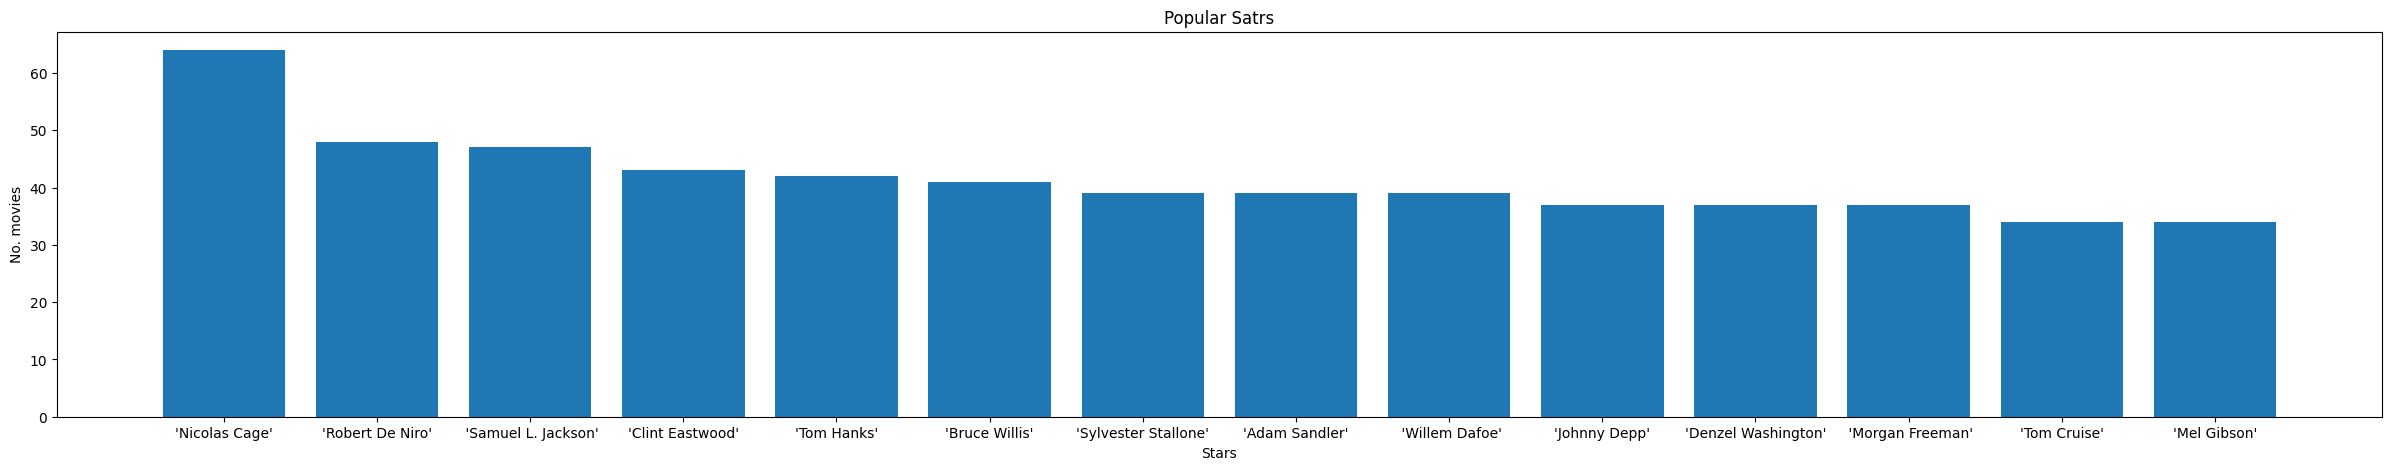

In [66]:
fig = plt.figure(figsize=(30, 5))

plt.bar(lact[:-15:-1], lactcount[:-15:-1])

plt.xlabel("Stars")
plt.ylabel("No. movies")
plt.title("Popular Satrs")
plt.show()


# Data Preprocessing

In [67]:
from sklearn.preprocessing import MinMaxScaler
numeric = ['year', 'imdb_ratings', 'meta_scores',
           'runtime(mins)', 'votes', 'gross($M)']
df[numeric] = df[numeric].fillna(0)

scaler = MinMaxScaler()
numeric= scaler.fit_transform(df[numeric])
len(numeric)


9900

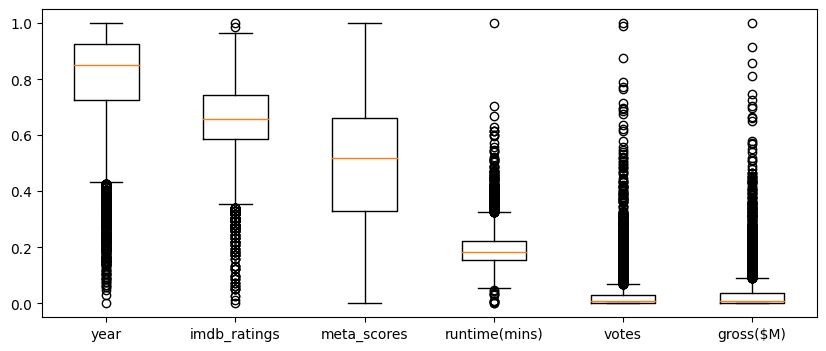

In [68]:
plt.figure(figsize=(10, 4))
plt.boxplot(numeric)
plt.xticks([1, 2, 3, 4, 5, 6], ['year', 'imdb_ratings', 'meta_scores','runtime(mins)', 'votes', 'gross($M)'])
plt.show()


In [69]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
cat = enc.fit_transform(df[['rating']])

In [73]:
txt_feature = ['director','all_stars','brief','all_genre']

df[txt_feature] = df[txt_feature].fillna('')

df['txt_feature']= df['director'] + ' '+df['all_stars']+ ' '+df['brief']+' '+df['all_genre']
df['txt_feature'] = df['txt_feature'].str.replace("'", '')
df['txt_feature'] = df['txt_feature'].str.replace(",", '')
df['txt_feature']

0       Frank Darabont Tim Robbins Morgan Freeman Bob ...
1       Francis Ford Coppola Marlon Brando Al Pacino J...
2       Christopher Nolan Christian Bale Heath Ledger ...
3       Peter Jackson Elijah Wood Viggo Mortensen Ian ...
4       Steven Spielberg Liam Neeson Ralph Fiennes Ben...
                              ...                        
9895    Bob Clark Jon Voight Scott Baio Vanessa Angel ...
9896    Darren Doane Kirk Cameron Darren Doane Bridget...
9897    Lawrence Kasanoff Hilary Duff Haylie Duff Char...
9898    Antoni Krauze Beata Fido Maciej Póltorak Aldon...
9899    Alphan Eseli Lale Mansur Salim Kechiouche Onur...
Name: txt_feature, Length: 9900, dtype: object

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf= tfidf.fit_transform(df['txt_feature'])
type(tfidf)

scipy.sparse._csr.csr_matrix

In [75]:
from scipy.sparse import hstack
stack = hstack((cat, numeric))
stack = hstack((stack, tfidf))
stack

<9900x33093 sparse matrix of type '<class 'numpy.float64'>'
	with 316188 stored elements in COOrdinate format>

# Cosine Similarity

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(stack, stack)

# Recommender System

In [ ]:
# give the title
title = 'The Dark Knight Rises'

In [118]:

idx = df.index[df['titles']==title].tolist()[0]
score = list(enumerate(cos_sim[idx]))
score = sorted(score, key=lambda x: x[1], reverse=True)
score = score[1:11]
movie_indices = [i[0] for i in sim_scores]
df['titles'].iloc[movie_indices]

62                                 The Dark Knight Rises
2                                        The Dark Knight
132                                        Batman Begins
12                                             Inception
3          The Lord of the Rings: The Return of the King
15     The Lord of the Rings: The Fellowship of the Ring
13                 The Lord of the Rings: The Two Towers
16                                          Forrest Gump
57                                     Avengers: Endgame
36                                          The Prestige
564                                               Avatar
Name: titles, dtype: object